In [6]:
import pandas as pd

# Load the merged CSV file
file_path = r'C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Death_Sentence\CSV\Death_Sentence.csv'
df = pd.read_csv(file_path, encoding='utf-8-sig')

# Display the first few rows of the DataFrame to verify the data has been loaded successfully
df.head()


,问题id,页码,答主昵称,答主性别,答主粉丝数,答主主页,答主签名,回答id,回答时间,评论数,...,Top Terms,topic_prob1,topic_prob2,topic_prob3,topic_prob4,topic_prob5,max_topic,cluster_label,named_entities,aspect_candidates
0,558551860,1,到处挖坑蒋玉成,男,103265,https://www.zhihu.com/people/CommanderYCJiangS117,北京亦庄营业部-快递员岗,2722269431,2022-10-19 18:42:55,82,...,"['人口', '大国', '亿', '超过', '几乎']",0.012599,0.012565,0.949719,0.012559,0.012558,3,4,"[('中国', 'GPE'), ('日本', 'GPE'), ('美国', 'GPE'), ...","['human_rights_and_ethics', 'international_com..."
1,558551860,1,嗽喇,男,4175,https://www.zhihu.com/people/jia-shao-xun,平凡人一枚,2717860337,2022-10-16 14:08:32,770,...,"['国人', '观点', '渣', '不必', '好处']",0.214062,0.083013,0.011348,0.011284,0.680294,5,0,"[('中国人', 'NORP')]",['cultural_and_social_attitudes']
2,558551860,1,轻工制造兔,男,5768,https://www.zhihu.com/people/qing-gong-zhi-zao-tu,设计师,2719113171,2022-10-17 12:30:11,120,...,"['人要', '反思', '亿人', '剩下', '总持']",0.013808,0.013497,0.730373,0.013635,0.228686,3,4,"[('74亿', 'CARDINAL'), ('60亿', 'CARDINAL')]","['cultural_and_social_attitudes', 'human_right..."
3,558551860,1,Zpuzzle,男,417892,https://www.zhihu.com/people/zhang-zhu-12,NaN,2721310071,2022-10-19 06:00:15,5,...,"['法国', '死刑', '废死', '人会', '觉得']",0.046536,0.001847,0.467289,0.001795,0.482533,5,0,"[('法国', 'GPE'), ('当年', 'DATE'), ('法国', 'GPE'),...","['cultural_and_social_attitudes', 'legal_and_j..."
4,558551860,1,文册,未知,219437,https://www.zhihu.com/people/wen-dao-wang-86,四大名著是个筐，什么都能往里装,2742052368,2022-11-03 02:33:26,22,...,"['办法', '老爷', '道', '没有', '杀']",0.005757,0.005712,0.005624,0.977261,0.005647,4,1,"[('唐牛儿', 'PERSON'), ('五百', 'CARDINAL'), ('唐牛儿'...",['others']


In [2]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Remove duplicate rows
df = df.drop_duplicates()

# Display the shape of the DataFrame before and after removing duplicates
print("Shape of DataFrame before removing duplicates:", df.shape)
print("Shape of DataFrame after removing duplicates:", df.drop_duplicates().shape)


Shape of DataFrame before removing duplicates: (1966, 13)
Shape of DataFrame after removing duplicates: (1966, 13)


In [3]:
# Convert text to lowercase(Not necessary but just in case some answers are in English or French and etc.)
df['回答内容'] = df['回答内容'].str.lower()

# Remove special characters and HTML tags
df['回答内容'] = df['回答内容'].str.replace(r'<[^>]+>', '')  # Remove HTML tags
df['回答内容'] = df['回答内容'].str.replace(r'[^a-zA-Z0-9\u4e00-\u9fa5\s]', '')  # Remove special characters except Chinese characters, alphanumeric characters, and whitespace

# Display the cleaned DataFrame
df.head()


,问题id,页码,答主昵称,答主性别,答主粉丝数,答主主页,答主签名,回答id,回答时间,评论数,点赞数,喜欢数,回答内容
0,558551860,1,到处挖坑蒋玉成,男,103265,https://www.zhihu.com/people/CommanderYCJiangS117,北京亦庄营业部-快递员岗,2722269431,2022-10-19 18:42:55,82,847,58,因为不光是中国，全世界几乎所有的主要人口大国都保留了死刑，包括日本和美国这样的人口超过1亿的...
1,558551860,1,嗽喇,男,4175,https://www.zhihu.com/people/jia-shao-xun,平凡人一枚,2717860337,2022-10-16 14:08:32,770,4575,370,因为中国人的观念很朴素呀。根本不必列废死的各种好处，国人的观点是：这人是个人渣，所以他得死。...
2,558551860,1,轻工制造兔,男,5768,https://www.zhihu.com/people/qing-gong-zhi-zao-tu,设计师,2719113171,2022-10-17 12:30:11,120,1775,129,为什么74亿人有60亿都支持死刑，而剩下的少数人谈及死刑，一般总持反对态度？这些人要不要反思一下？
3,558551860,1,Zpuzzle,男,417892,https://www.zhihu.com/people/zhang-zhu-12,NaN,2721310071,2022-10-19 06:00:15,5,2134,215,拿法国来说，当年法国废除死刑的时候，民调显示的废死支持率差不多不到20%——但就是在这种情况...
4,558551860,1,文册,未知,219437,https://www.zhihu.com/people/wen-dao-wang-86,四大名著是个筐，什么都能往里装,2742052368,2022-11-03 02:33:26,22,410,38,宋江杀了阎婆惜，知县却将与此事毫不相关的唐牛儿打了一顿并刺配五百里外。回到内衙知县夫人有点儿...


In [4]:
import re
import jieba

# Define a list of stop words
stop_words = set([
    "$", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "?", "_", "“", "”", "、",
    "。", "《", "》", "一", "一些", "一何", "一切", "一则", "一方面", "一旦", "一个", "一来", "一样", "一般", "一转眼",
    "万一", "两", "两个", "俩", "上", "上下", "下", "不仅", "不但", "不光", "不单", "不只", "不外乎", "不如", "不妨", "不尽",
    "不尽然", "不得", "不怕", "不惟", "不成", "不拘", "不料", "不是", "不比", "不然", "不特", "不独", "不管",
    "不至于", "不若", "不论", "不过", "不问", "与", "与其", "与其说", "与否", "与此同时", "且", "且不说",
    "且说", "两者", "个", "个别", "临", "为", "为了", "为什么", "为何", "为止", "为此", "为着", "乃", "乃至",
    "乃至于", "么", "之", "之一", "之所以", "之类", "乌乎", "乎", "乘", "也", "也好", "也罢", "了", "二来",
    "于", "于是", "于是乎", "云云", "云尔", "些", "亦", "人", "里", "人们", "人家", "什么", "什么样", "今", "介于",
    "仍", "仍旧", "从", "从此", "从而", "他", "他人", "他们", "以", "以上", "以为", "以便", "以免", "以及",
    "以故", "以期", "以来", "以至", "以至于", "以致", "们", "任", "任何", "任凭", "似的", "但", "但凡", "但是",
    "何", "何以", "何况", "何处", "何时", "余外", "作为", "你", "你们", "使", "使得", "例如", "依", "依据",
    "依照", "便于", "俺", "俺们", "倘", "倘使", "倘或", "倘然", "倘若", "借", "假使", "假如", "假若", "傥然",
    "像", "儿", "先不先", "光是", "全体", "全部", "兮", "关于", "其", "其一", "其中", "其二", "其他", "其余",
    "其它", "其次", "具体地说", "具体说来", "兼之", "内", "再", "再其次", "再则", "再有", "再者", "再者说", "再说",
    "冒", "冲", "况且", "几", "几时", "凡", "凡是", "凭", "凭借", "出于", "出来", "分别", "则", "则甚", "别",
    "别人", "别处", "别是", "别的", "别管", "别说", "到", "前后", "前此", "前者", "加之", "加以", "即", "即令",
    "即使", "即便", "即如", "即或", "即若", "却", "去", "又", "又及", "及", "及其", "及至", "反之", "反而",
    "反过来", "反过来说", "受到", "另", "另一方面", "另外", "另悉", "只", "只当", "只怕", "只是", "只有", "只消",
    "只要", "只限", "叫", "叮咚", "可", "可以", "可是", "可见", "各", "各个", "各位", "各种", "各自", "同",
    "同时", "后", "后者", "向", "向使", "向着", "吓", "吗", "否则", "吧", "吧哒", "吱", "呀", "呃", "呕", "呗",
    "呜", "呜呼", "呢", "呵", "呵呵", "呸", "呼哧", "咋", "和", "咚", "咦", "咧", "咱", "咱们", "咳", "哇",
    "哈", "哈哈", "哉", "哎", "哎呀", "哎哟", "哗", "哟", "哦", "哩", "哪", "哪个", "哪些", "哪儿", "哪天",
    "哪年", "哪怕", "哪样", "哪边", "哪里", "哼", "哼唷", "唉", "唯有", "啊", "啐", "啥", "啦", "啪达", "啷当",
    "喂", "喏", "喔唷", "喽", "嗡", "嗡嗡", "嗬", "嗯", "嗳", "嘎", "嘎登", "嘘", "嘛", "嘻", "嘿", "嘿嘿",
    "因", "因为", "因了", "因此", "因着", "因而", "固然", "在", "在下", "在于", "地", "基于", "处在", "多",
    "多么", "多少", "大", "大家", "她", "她们", "好", "如", "如上", "如上所述", "如下", "如何", "如其", "如同",
    "如是", "如果", "如此", "如若", "始而", "孰料", "孰知", "宁", "宁可", "宁愿", "宁肯", "它", "它们", "对",
    "对于", "对待", "对方", "对比", "将", "小", "尔", "尔后", "尔尔", "尚且", "就", "就是", "就是了", "就是说",
    "就算", "就要", "尽", "尽管", "尽管如此", "岂但", "己", "已", "已矣", "巴", "巴巴", "并", "并且", "并非",
    "庶乎", "庶几", "开外", "开始", "归", "归齐", "当", "当地", "当然", "当着", "彼", "彼时", "彼此", "往",
    "待", "很", "得", "得了", "怎", "怎么", "怎么办", "怎么样", "怎奈", "怎样", "总之", "总的来看", "总的来说",
    "总的说来", "总而言之", "恰恰相反", "您", "惟其", "慢说", "我", "我们", "或", "或则", "或是", "或曰", "或者",
    "截至", "所", "所以", "所在", "所幸", "所有", "才", "才能", "打", "打从", "把", "抑或", "拿", "按", "按照",
    "换句话说", "换言之", "据", "据此", "接着", "更", "故", "故此", "故而", "旁人", "无", "无宁", "无论", "既", "既往",
    "既是", "既然", "时候", "是", "是以", "是的", "就", "就是", "曾", "替", "替代", "最", "有", "有些", "有关", "有及", "有时",
    "有的", "望", "朝", "朝着", "本", "本人", "本地", "本着", "本身", "来", "来着", "来自", "来说", "极了",
    "果然", "果真", "某", "某个", "某些", "某某", "根据", "欤", "正值", "正如", "正巧", "正是", "此", "此地",
    "此处", "此外", "此时", "此次", "此间", "毋宁", "每", "每当", "比", "比及", "比如", "比方", "没奈何", "沿",
    "沿着", "漫说", "焉", "然则", "然后", "然而", "照", "照着", "犹且", "犹自", "甚且", "甚么", "甚或", "甚而",
    "甚至", "甚至于", "用", "用来", "由", "由于", "由是", "由此", "由此可见", "的", "的确", "的话", "直到", "相对而言",
    "省得", "看", "眨眼", "着", "着呢", "矣", "矣乎", "矣哉", "离", "竟而", "第", "等", "等到", "等等", "简言之",
    "管", "类如", "紧接着", "纵", "纵令", "纵使", "纵然", "经", "经过", "结果", "给", "继之", "继后", "继而",
    "综上所述", "罢了", "者", "而", "而且", "而况", "而后", "而外", "而已", "而是", "而言", "能", "能否", "腾",
    "自", "自个儿", "自从", "自各儿", "自后", "自家", "自己", "自打", "自身", "至", "至于", "至今", "至若",
    "致", "般的", "若", "若夫", "若是", "若果", "若非", "莫不然", "莫如", "莫若", "虽", "虽则", "虽然",
    "虽说", "被", "要", "要不", "要不是", "要不然", "要么", "要是", "譬喻", "譬如", "让", "许多", "论",
    "设使", "设或", "设若", "诚如", "诚然", "该", "说来", "诸", "诸位", "诸如", "谁", "谁人", "谁料", "谁知",
    "贼死", "赖以", "赶", "起", "起见", "趁", "趁着", "越是", "距", "跟", "较", "较之", "边", "过", "还",
    "还是", "还有", "还要", "这", "这一来", "这个", "这么", "这么些", "这么样", "这么点儿", "这些", "这会儿",
    "这儿", "这就是说", "这时", "这样", "这次", "这般", "这边", "这里", "进而", "连", "连同", "逐步", "通过",
    "遵循", "遵照", "那", "那个", "那么", "那么些", "那么样", "那些", "那会儿", "那儿", "那时", "那样",
    "那般", "那边", "那里", "都", "鄙人", "鉴于", "针对", "阿", "除", "除了", "除外", "除开", "除此之外",
    "除非", "随", "随后", "随时", "随着", "难道说", "非但", "非徒", "非特", "非独", "靠", "顺", "顺着",
    "首先", "！", "，", "：", "；", "？"
])

# Function to tokenize text, remove punctuation marks, and stop words
def tokenize_and_remove_stopwords(text):
    # Tokenize the text using Jieba
    tokens = jieba.lcut(text)
    # Remove punctuation marks using regular expression
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    # Remove stop words
    tokens = [token for token in tokens if token.strip() and token not in stop_words]
    return tokens

# Drop rows with missing values in the '回答内容' column
df.dropna(subset=['回答内容'], inplace=True)

# Tokenize the text, remove punctuation marks, and stop words
df['tokenized_content'] = df['回答内容'].apply(tokenize_and_remove_stopwords)

# Display the tokenized content
print(df['tokenized_content'].head())


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jesse\AppData\Local\Temp\jieba.cache
Loading model cost 0.714 seconds.
Prefix dict has been built successfully.


0    [中国, 全世界, 几乎, 主要, 人口, 大国, 保留, 死刑, 包括, 日本, 美国, ...
1    [中国, 观念, 朴素, 根本, 不必, 列废死, 好处, 国人, 观点, 这人, 个人, ...
2    [74, 亿人, 60, 亿都, 支持, 死刑, 剩下, 少数, 谈及, 死刑, 总持, 反...
3    [法国, 当年, 法国, 废除, 死刑, 民调, 显示, 废死, 支持率, 差不多, 不到,...
4    [宋江, 杀, 阎婆惜, 知县, 此事, 毫不相关, 唐牛儿, 一顿, 刺配, 五百里, 外...
Name: tokenized_content, dtype: object


In [5]:
# Write the DataFrame to the original CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with tokenized content has been saved to the original file:", file_path)


DataFrame with tokenized content has been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Death_Sentence\CSV\Death_Sentence.csv


In [6]:
import torch
import numpy as np
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import pandas as pd
from torch.nn.functional import softmax
import time

# Set random seed for reproducibility
seed = 59

torch.manual_seed(seed)
np.random.seed(seed)

# Load the pre-trained RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Load the pre-trained RoBERTa model for sequence classification
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)  # Assuming 3 labels: positive, negative, neutral

# Load your tokenized text data
file_path = file_path  # Make sure 'file_path' is defined somewhere in your code
df = pd.read_csv(file_path, encoding='utf-8-sig')

# Define a function to perform sentiment analysis using RoBERTa
def roberta_sentiment_analysis(text):
    # Tokenize the text and convert it into input IDs
    input_ids = tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True, padding='max_length', return_tensors='pt')

    # Perform forward pass to get logits
    with torch.no_grad():
        outputs = model(input_ids)
        logits = outputs.logits

    # Apply softmax to convert logits to probabilities
    probabilities = softmax(logits, dim=1).squeeze().tolist()
    
    # Determine the sentiment label based on the highest probability
    sentiment_label = ['Positive', 'Negative', 'Neutral'][probabilities.index(max(probabilities))]
    
    return probabilities, sentiment_label

# Measure the start time
start_time = time.time()

# Apply sentiment analysis function to the tokenized content
df['sentiment_probs'], df['sentiment_label'] = zip(*df['回答内容'].apply(roberta_sentiment_analysis))

# Measure the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = (end_time - start_time) / 60
print(f"Time elapsed: {elapsed_time} minutes")
print(f"一共用时:{elapsed_time}分钟")

# Display the DataFrame with sentiment probabilities and labels
print(df[['tokenized_content', 'sentiment_probs', 'sentiment_label']].head())


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Time elapsed: 20.818775041898093 minutes
一共用时:20.818775041898093分钟
                                   tokenized_content  \
0  ['中国', '全世界', '几乎', '主要', '人口', '大国', '保留', '死...   
1  ['中国', '观念', '朴素', '根本', '不必', '列废死', '好处', '国...   
2  ['74', '亿人', '60', '亿都', '支持', '死刑', '剩下', '少数...   
3  ['法国', '当年', '法国', '废除', '死刑', '民调', '显示', '废死...   
4  ['宋江', '杀', '阎婆惜', '知县', '此事', '毫不相关', '唐牛儿', ...   

                                     sentiment_probs sentiment_label  
0  [0.3337985873222351, 0.33376583456993103, 0.33...        Positive  
1  [0.33107611536979675, 0.3364509046077728, 0.33...        Negative  
2  [0.33159446716308594, 0.33559149503707886, 0.3...        Negative  
3  [0.3270370364189148, 0.3357904851436615, 0.337...         Neutral  
4  [0.32802706956863403, 0.3343939483165741, 0.33...         Neutral  


In [7]:
# Write the DataFrame to the original CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with tokenized content after sentiment analysis has been saved to the original file:", file_path)

DataFrame with tokenized content after sentiment analysis has been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Death_Sentence\CSV\Death_Sentence.csv


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Join all the items in 'tokenized_content' together as a list of strings
tokenized_docs = df['tokenized_content'].apply(lambda x: ' '.join(x)).tolist()

# Initialize CountVectorizer with appropriate parameters for Chinese text
# Ensure that max_df is greater than or equal to min_df
count_vectorizer = CountVectorizer(tokenizer=jieba.lcut, min_df=5)

# Fit and transform the list of tokenized documents to create the Document-Term Matrix (DTM)
dtm = count_vectorizer.fit_transform(tokenized_docs)

# Display the DTM
dtm_df = pd.DataFrame(dtm.toarray(), columns=count_vectorizer.get_feature_names_out())
dtm_df.head()


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,,',",",0,1,2,3,4,5,6,...,鲜,鸡,麻,黄,黑,默,鼓,齐,龄,龙
0,105,30,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,114,34,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,117,34,16,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,928,262,130,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,559,160,79,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

# Define a function to preprocess and join tokenized content
def preprocess_and_join(tokens):
    # Join tokens into a single string
    joined_str = ' '.join(tokens)
    # Remove unwanted characters using regular expression
    cleaned_str = re.sub(r'[\[\],\'\s]+', '', joined_str)
    return cleaned_str

# Apply preprocessing and join tokenized content, then convert to list
tokenized_docs = df['tokenized_content'].apply(preprocess_and_join).tolist()

# Initialize CountVectorizer with appropriate parameters for Chinese text
# Ensure that max_df is greater than or equal to min_df
count_vectorizer = CountVectorizer(tokenizer=jieba.lcut, min_df=5)

# Fit and transform the list of tokenized documents to create the Document-Term Matrix (DTM)
dtm = count_vectorizer.fit_transform(tokenized_docs)

# Display the DTM
dtm_df = pd.DataFrame(dtm.toarray(), columns=count_vectorizer.get_feature_names_out())
dtm_df.head()


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,10,100,1000,11,12,13,14,15,16,17,...,高度,高祖,高级,魔,麻烦,黑帮,黑社会,默认,鼓励,鼓吹
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

# Initialize TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Compute TF-IDF scores for the DTM
tfidf_matrix = tfidf_transformer.fit_transform(dtm)

# Convert the TF-IDF matrix to a DataFrame for better visualization (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the TF-IDF matrix (optional)
print(tfidf_df.head())


    10  100  1000   11   12   13   14   15   16   17  ...   高度   高祖   高级    魔  \
0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    麻烦   黑帮  黑社会   默认   鼓励   鼓吹  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 2435 columns]


In [11]:
# Compute document-level TF-IDF scores by summing TF-IDF scores for each term within each document
document_tfidf_scores = tfidf_matrix.sum(axis=1)

# Convert the document-level TF-IDF scores to a DataFrame for better visualization
document_tfidf_df = pd.DataFrame(document_tfidf_scores, columns=["TF-IDF Score"])

# Add a column to the DataFrame to indicate the document index or ID
document_tfidf_df["Document Index"] = df.index

# Display the document-level TF-IDF scores
print(document_tfidf_df.head())


   TF-IDF Score  Document Index
0      3.539825               0
1      3.574619               1
2      3.501284               2
3      8.461229               3
4      4.906994               4


In [12]:
# Identify the top N important terms in each document based on TF-IDF scores
top_n_terms_per_document = 5  # Change this value as needed
top_terms_per_document = []

for document_index in range(len(df)):
    # Get the TF-IDF scores for the current document
    tfidf_scores = tfidf_matrix[document_index].toarray()[0]
    # Get the indices of the top N terms based on TF-IDF scores
    top_term_indices = tfidf_scores.argsort()[-top_n_terms_per_document:][::-1]
    # Get the actual terms from the CountVectorizer
    top_terms = [count_vectorizer.get_feature_names_out()[index] for index in top_term_indices]
    # Append the top terms to the list
    top_terms_per_document.append(top_terms)

# Add the top terms to the DataFrame
document_tfidf_df["Top Terms"] = top_terms_per_document

# Display the DataFrame with document-level TF-IDF scores and top terms
print(document_tfidf_df.head())

   TF-IDF Score  Document Index             Top Terms
0      3.539825               0   [人口, 大国, 亿, 超过, 几乎]
1      3.574619               1   [国人, 观点, 渣, 不必, 好处]
2      3.501284               2  [人要, 反思, 亿人, 剩下, 总持]
3      8.461229               3  [法国, 死刑, 废死, 人会, 觉得]
4      4.906994               4    [办法, 老爷, 道, 没有, 杀]


In [13]:
# Concatenate document_tfidf_df with df along the columns axis
df = pd.concat([df, document_tfidf_df], axis=1)

# Save the concatenated DataFrame to the specified file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("Document-Level TF-IDF Scores and Top Terms have been saved to the original file:", file_path)

# Define file paths for saving
dtm_df_file_path = r'C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Death_Sentence\CSV\dtm_df.csv'
tfidf_df_file_path = r'C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Death_Sentence\CSV\tfidf_df.csv'

# Save DataFrames to CSV files
dtm_df.to_csv(dtm_df_file_path, index=False, encoding='utf-8-sig')
tfidf_df.to_csv(tfidf_df_file_path, index=False, encoding='utf-8-sig')

print("Document-Term Matrix DataFrame and TF-IDF DataFrame have been saved to their respective directories.")


Document-Level TF-IDF Scores and Top Terms have been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Death_Sentence\CSV\Death_Sentence.csv
Document-Term Matrix DataFrame and TF-IDF DataFrame have been saved to their respective directories.


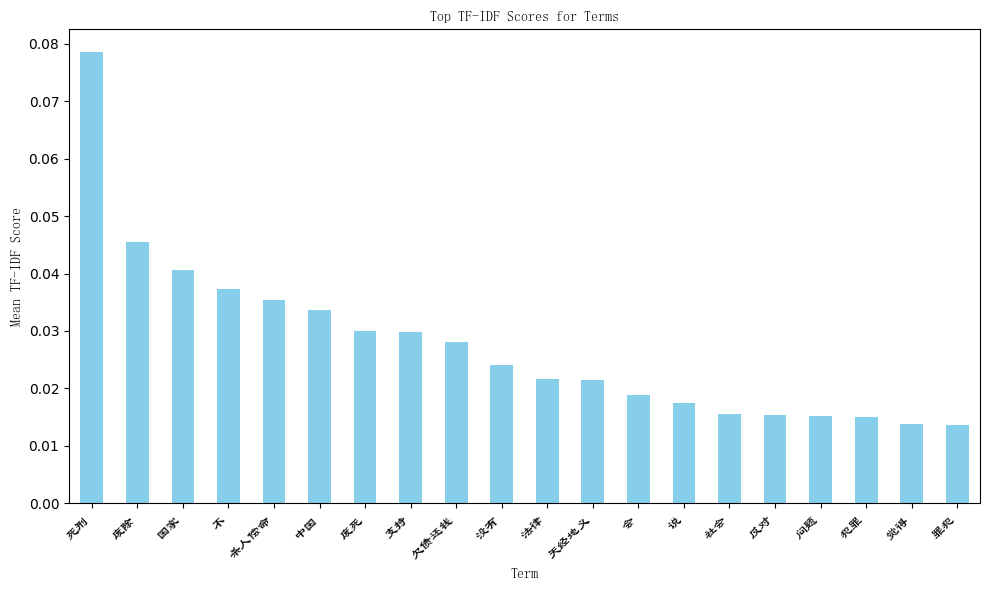

In [14]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Calculate mean TF-IDF scores for each term across all documents
mean_tfidf_scores = tfidf_df.mean(axis=0)

# Sort terms based on mean TF-IDF scores in descending order
sorted_terms = mean_tfidf_scores.sort_values(ascending=False)

# Select top N terms to visualize
top_n = 20  # You can adjust this value as needed
top_terms = sorted_terms[:top_n]

# Specify the path to the SimFang font file
font_path =  r'C:\Users\jesse\PycharmProjects\CN_Specturm\Fonts\SIMLI.TTF'

# Register the SimFang font with Matplotlib
custom_font = FontProperties(fname=font_path)

# Plot bar chart with custom font
plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title('Top TF-IDF Scores for Terms', fontproperties=custom_font)
plt.xlabel('Term', fontproperties=custom_font)
plt.ylabel('Mean TF-IDF Score', fontproperties=custom_font)
plt.xticks(rotation=45, ha='right', fontproperties=custom_font)
plt.tight_layout()
plt.show()

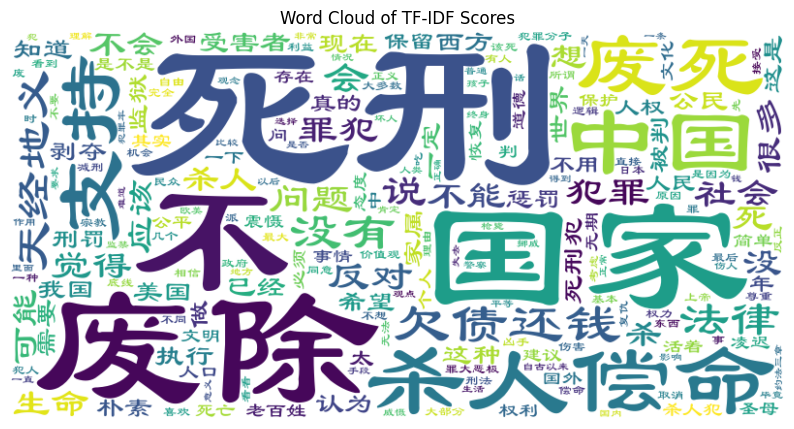

In [15]:
from wordcloud import WordCloud

# Generate word cloud with custom font
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(mean_tfidf_scores)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of TF-IDF Scores')
plt.axis('off')
plt.show()

In [16]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model
num_topics = 5  # Adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit LDA model to the DTM
lda_output = lda_model.fit_transform(dtm)

# Display the shape of the LDA output
print("Shape of LDA output:", lda_output.shape)

# Display the LDA model
print(lda_model)


Shape of LDA output: (1961, 5)
LatentDirichletAllocation(n_components=5, random_state=42)


In [17]:
# Define the column names for topic probabilities
topic_columns = ['topic_prob1', 'topic_prob2', 'topic_prob3', 'topic_prob4', 'topic_prob5']

# Create a DataFrame to store the document-level topic probabilities
topic_prob_df = pd.DataFrame(lda_output, columns=topic_columns)

# Combine the topic probabilities DataFrame with the original DataFrame df
df = pd.concat([df, topic_prob_df], axis=1)

# Write the combined DataFrame to a CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("DataFrame with document-level topic probabilities has been saved")


DataFrame with document-level topic probabilities has been saved


In [18]:
from gensim import matutils
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

# Reverse the mapping from count_vectorizer vocabulary
id2word = {index: word for word, index in count_vectorizer.vocabulary_.items()}

# Create a corpus-like structure from CountVectorizer vocabulary
corpus_list = [[(index, 1)] for index in range(len(count_vectorizer.vocabulary_))]

# Convert Python dictionary to gensim Dictionary
gensim_dictionary = Dictionary.from_corpus(corpus_list, id2word=id2word)

# Convert scikit-learn DTM to gensim corpus
corpus = matutils.Sparse2Corpus(dtm.T)

# Convert scikit-learn LDA model to gensim-compatible format
num_topics = lda_model.n_components
lda_model_gensim = LdaModel(
    corpus=corpus,
    id2word=gensim_dictionary,
    num_topics=num_topics
)

# Visualize the LDA model using pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis_data = pyLDAvis.gensim.prepare(lda_model_gensim, corpus, gensim_dictionary)

# If you display it here, the button icons (save, insert cells, copy and run and etc up top) would be gone
# Don't know why............
# pyLDAvis.display(vis_data)

# Due to the random initialization of parameters and the stochastic nature of the algorithm, the visualization is slightly different each run.
# Later I will experiment with different values for hyperparameters 
# such as the number of topics, alpha, and beta to find the configuration 
# that yields stable and interpretable results.

In [19]:
from pyLDAvis import save_html

output_directory = r'C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Death_Sentence\CSV\Death_Sentence_lda_visualization.html'

# Save the visualization to an HTML file
pyLDAvis.save_html(vis_data, output_directory)
print("Visualized content has been saved to: ", output_directory)


Visualized content has been saved to:  C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Death_Sentence\CSV\Death_Sentence_lda_visualization.html


In [20]:
import webbrowser

# Open the HTML file in the default web browser
webbrowser.open_new_tab(output_directory)


True

In [21]:
import pandas as pd

# # Load the DataFrame
# df = pd.read_csv(file_path, encoding='utf-8-sig')

# Define a function to determine the topic(s) with the highest probability for each narrative
def get_max_topic(row):
    # Extract topic probabilities from the row
    topic_probs = row[['topic_prob1', 'topic_prob2', 'topic_prob3', 'topic_prob4', 'topic_prob5']]
    # Convert topic probabilities to float
    topic_probs = [float(prob) for prob in topic_probs]
    # Find the index of the topic with the highest probability
    max_topic_index = topic_probs.index(max(topic_probs))
    # Return the index of the topic with the highest probability
    return max_topic_index + 1  # Adding 1 to make the index 1-based

# Apply the function to each row to determine the topic(s) with the highest probability for each narrative
df['max_topic'] = df.apply(get_max_topic, axis=1)

# Append the newly generated columns to the original file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("Newly generated columns and data have been appended to the original file:", file_path)

Newly generated columns and data have been appended to the original file: C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Death_Sentence\CSV\Death_Sentence.csv


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


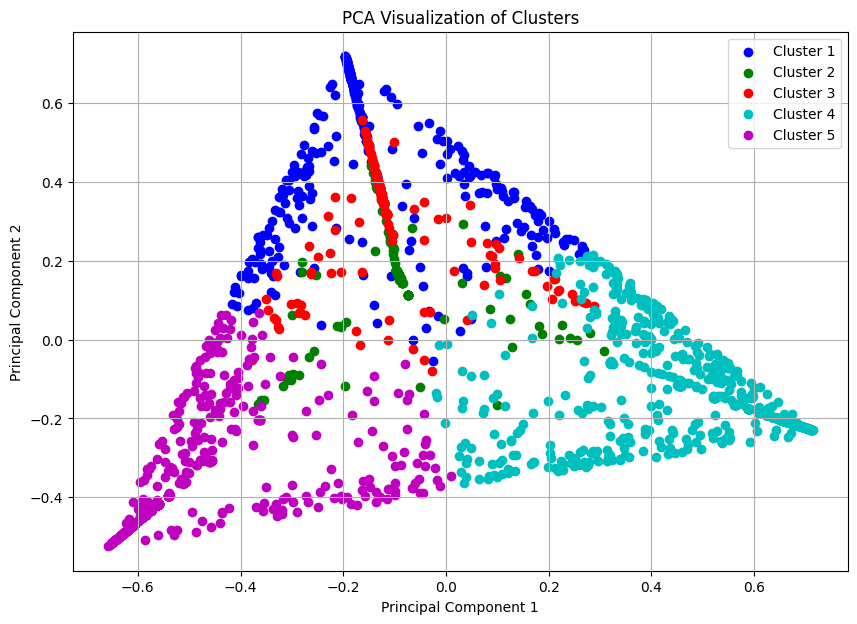

In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming lda_model is your trained LDA model and dtm is your document-term matrix
# Get dominant topic probabilities for each document
dominant_topics = [np.argmax(prob) for prob in lda_model.transform(dtm)]

# Assuming num_clusters is the number of clusters you want
num_clusters = 5  # You can adjust this value based on your dataset and requirements

# Perform K-means clustering based on dominant topic probabilities
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(lda_output)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(lda_output)

# Plot the clusters
plt.figure(figsize=(10, 7))

# Define colors for each cluster
colors = ['b', 'g', 'r', 'c', 'm']

for cluster_label, color in zip(range(num_clusters), colors):
    cluster_indices = np.where(clusters == cluster_label)[0]
    plt.scatter(pca_result[cluster_indices, 0], pca_result[cluster_indices, 1], c=color, label=f'Cluster {cluster_label + 1}')

plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Add cluster labels to the DataFrame
df['cluster_label'] = clusters

# Now you can save the DataFrame to a CSV file
file_path = file_path
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("DataFrame with cluster labels has been saved to:", file_path)

DataFrame with cluster labels has been saved to: C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Death_Sentence\CSV\Death_Sentence.csv


In [24]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Filter data by cluster_label
clusters = df['cluster_label'].unique()
top_keywords_per_cluster = {}
top_terms_per_cluster = {}

# Step 2-4: Calculate top terms for each cluster
for cluster in clusters:
    # Filter data by cluster_label
    cluster_data = df[df['cluster_label'] == cluster]
    
    # Concatenate tokenized content for the cluster
    cluster_corpus = ' '.join(cluster_data['tokenized_content'])
    
    # Calculate TF-IDF scores for the cluster corpus
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([cluster_corpus])
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()[0]
    
    # Get the top terms for the cluster based on TF-IDF scores
    top_term_indices = tfidf_scores.argsort()[-10:][::-1]  # Get indices of top 10 terms
    top_terms = [feature_names[idx] for idx in top_term_indices]
    
    # Store top terms for the cluster
    top_terms_per_cluster[cluster] = top_terms
    
    # Flatten the list of lists of terms
    keywords = [term for sublist in cluster_data["Top Terms"] for term in sublist]
    
    # Find the top 10 most frequent keywords for each cluster
    keyword_counter = Counter(keywords)
    top_keywords = keyword_counter.most_common(10)  # Get the top 10 most common keywords
    top_keywords_per_cluster[cluster] = [keyword[0] for keyword in top_keywords]  # Extract the keyword from (keyword, count) tuple

# Sort the dictionaries by cluster label
sorted_top_keywords_per_cluster = dict(sorted(top_keywords_per_cluster.items()))
sorted_top_terms_per_cluster = dict(sorted(top_terms_per_cluster.items()))

# Print the top 10 keywords for each cluster
print("Ten Most Frequent Words for Each Cluster")
for cluster, keywords in sorted_top_keywords_per_cluster.items():
    print(f"Cluster {cluster + 1} Most Frequent Words: {' '.join(keywords)}")

# Print top 10 terms for each cluster
print("\nTen Top Terms for Each Cluster")
for cluster, terms in sorted_top_terms_per_cluster.items():
    print(f"Cluster {cluster + 1} top terms: {' '.join(terms)}")


Ten Most Frequent Words for Each Cluster
Cluster 1 Most Frequent Words: 法律 生命 国家 剥夺 大概 鼓吹 废死 惩罚 死刑 道德
Cluster 2 Most Frequent Words: 鼓吹 大概 大夫 大胆 大众 报德 挪威 年 大佬 以德报怨
Cluster 3 Most Frequent Words: 杀人偿命 欠债还钱 天经地义 大胆 大众 鼓吹 大概 大佬 大致 中国
Cluster 4 Most Frequent Words: 死刑 支持 废死 鼓吹 大概 废除 大众 不 死 罪犯
Cluster 5 Most Frequent Words: 死刑 国家 废除 中国 鼓吹 支持 大众 反对 废死 没有

Ten Top Terms for Each Cluster
Cluster 1 top terms: 死刑 法律 国家 废死 社会 废除 没有 生命 问题 权利
Cluster 2 top terms: 死刑 挪威 没有 老安 学生 监狱 国家 布雷 维克 圣母
Cluster 3 top terms: 杀人偿命 欠债还钱 死刑 天经地义 中国 没有 老西 徐长 女孩 这种
Cluster 4 top terms: 死刑 废除 废死 支持 没有 罪犯 中国 不会 社会 犯罪
Cluster 5 top terms: 死刑 废除 国家 中国 没有 废死 社会 支持 犯罪 法律


In [25]:
# Now you can group the narratives by their assigned thematic clusters
grouped_clusters = df.groupby('cluster_label')

# Iterate over each thematic cluster and access the narratives within each cluster
for cluster_label, group_df in grouped_clusters:
    print(f"Cluster {cluster_label + 1}:")
    print(group_df['tokenized_content'].head())  # Here we pass the already tokenized text instead of the original content
    print()


Cluster 1:
1     ['中国', '观念', '朴素', '根本', '不必', '列废死', '好处', '国...
3     ['法国', '当年', '法国', '废除', '死刑', '民调', '显示', '废死...
6     ['法哲', '扯', 'jb', '蛋', '是从', '唯心主义', '出发', '独断...
12    ['从小', '国外', '长大', '国外', '法学', '本硕', '中国', '探讨...
22    ['人类', '自然', '状态', '存在', '杀人偿命', '欠债还钱', '同态复仇...
Name: tokenized_content, dtype: object

Cluster 2:
4     ['宋江', '杀', '阎婆惜', '知县', '此事', '毫不相关', '唐牛儿', ...
21    ['欠债还钱', '杀人偿命', '中国', '天经地义', '废除', '死刑', '可能...
34    ['今天', '世界', '正在', '发生', '一件', '中国', '大规模', '道...
41    ['归根结底', '中国', '不人道', '2022', '年', '还学', '不会',...
42    ['一天', '题主', '你家', '隔壁', '搬', '一户', '男主人', '花臂...
Name: tokenized_content, dtype: object

Cluster 3:
7             ['国家', '做', '一定', '正确', '不配', '不配', '活着']
26    ['没有', '国家', '废死', '所谓', '废死', '国家', '一个个', '拉...
58    ['年轻', '觉得', '死刑', '必要', '年龄', '增长', '世界', '观察...
60    ['约法三章', '杀人偿命', '汉朝', '中国', '几千年', '政权', '立国之...
64    ['或许', '了解', '一下', '大部分', '被判', '死刑', '可能', '出...
Name: tokenized_content, dtype: object

Cluster

In [26]:
# Initialize an empty dictionary to store the sentiment distribution for each cluster
sentiment_distribution = {}

# Iterate over each cluster
for cluster, group_df in grouped_clusters:
    # Count the occurrences of each sentiment label in the current cluster
    label_counts = group_df['sentiment_label'].value_counts()
    
    # Calculate the total number of narratives in the current cluster
    total_narratives = label_counts.sum()
    
    # Calculate the proportion of each sentiment label and store it in the sentiment distribution dictionary
    sentiment_distribution[cluster] = {
        'Positive': label_counts.get('Positive', 0) / total_narratives,
        'Negative': label_counts.get('Negative', 0) / total_narratives,
        'Neutral': label_counts.get('Neutral', 0) / total_narratives
    }

# Print the sentiment distribution for each cluster
for cluster, distribution in sentiment_distribution.items():
    print(f"Cluster {cluster + 1}:")
    for sentiment, proportion in distribution.items():
        print(f"   {sentiment}: {proportion:.2%}")
    print()


Cluster 1:
   Positive: 9.12%
   Negative: 74.53%
   Neutral: 16.35%

Cluster 2:
   Positive: 18.18%
   Negative: 67.13%
   Neutral: 14.69%

Cluster 3:
   Positive: 22.76%
   Negative: 64.93%
   Neutral: 12.31%

Cluster 4:
   Positive: 10.93%
   Negative: 77.11%
   Neutral: 11.95%

Cluster 5:
   Positive: 12.22%
   Negative: 72.30%
   Neutral: 15.48%



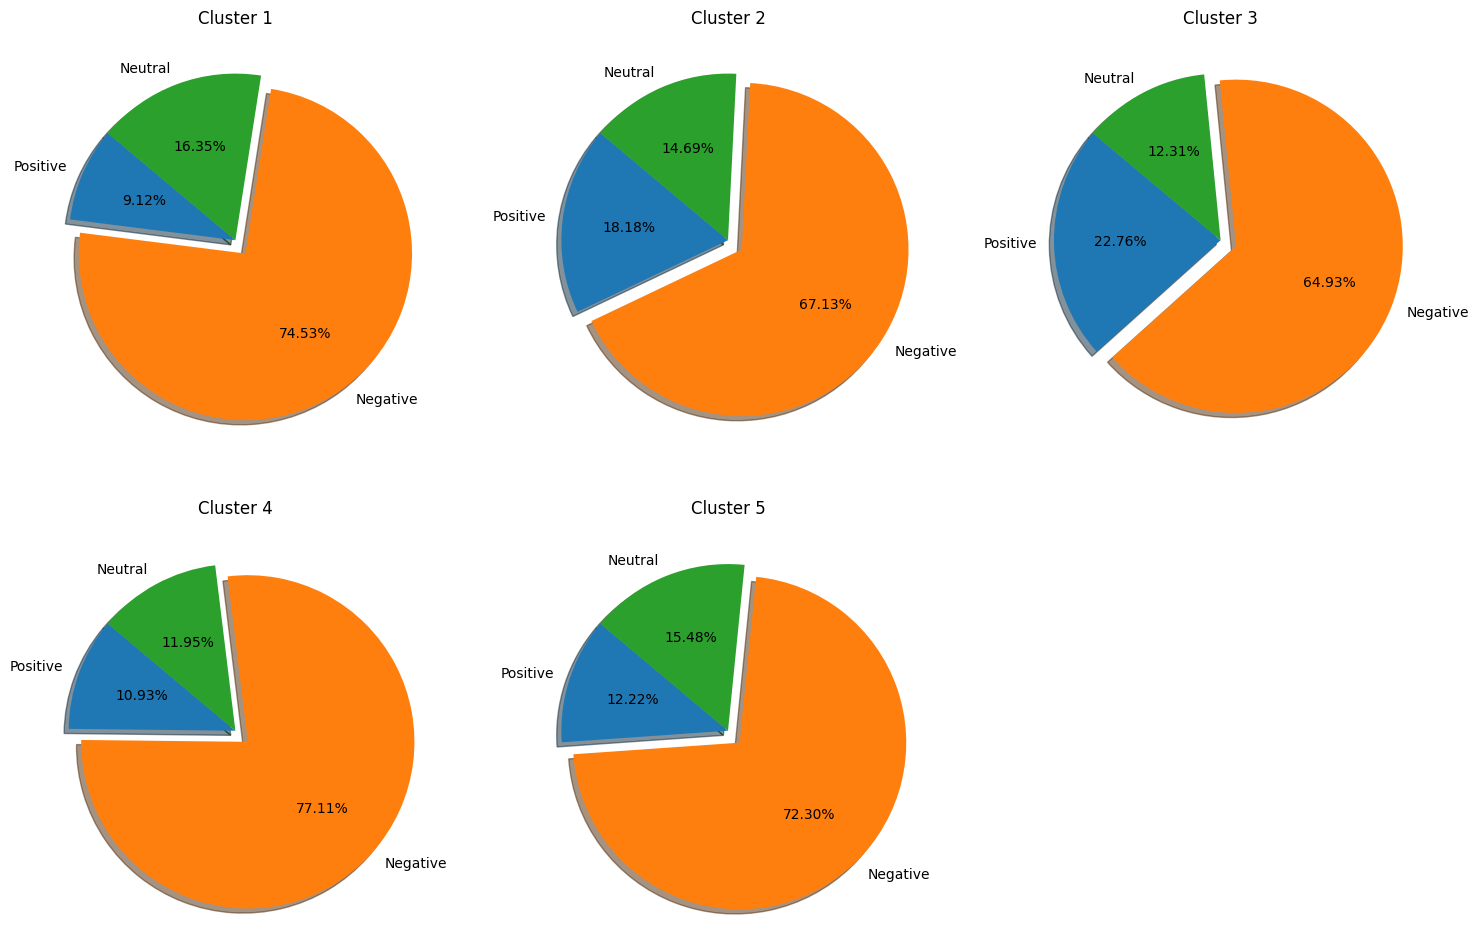

In [27]:
import matplotlib.pyplot as plt

# Plotting pie charts for each cluster
plt.figure(figsize=(15, 10))
for i, (cluster, distribution) in enumerate(sentiment_distribution.items(), 1):
    labels = distribution.keys()
    sizes = distribution.values()
    explode = (0, 0.1, 0)  # explode the 'Negative' slice
    plt.subplot(2, 3, i)
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=140)
    plt.title(f"Cluster {cluster + 1}")

plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import spacy

# Load the Chinese NER model from spaCy
nlp = spacy.load("zh_core_web_sm")

# Load the CSV file
file_path = r'C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Death_Sentence\CSV\Death_Sentence.csv'
df = pd.read_csv(file_path)

# Define a function to perform Named Entity Recognition (NER) on text
def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER to the '回答内容' column and create a new column for named entities
df['named_entities'] = df['回答内容'].apply(perform_ner)

# Display the dataframe with named entities
print(df[['回答内容', 'named_entities']].head())

# Save the named_entities to original CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with NER has been saved to the original file:", file_path)


                                                回答内容  \
0  因为不光是中国，全世界几乎所有的主要人口大国都保留了死刑，包括日本和美国这样的人口超过1亿的...   
1  因为中国人的观念很朴素呀。根本不必列废死的各种好处，国人的观点是：这人是个人渣，所以他得死。...   
2  为什么74亿人有60亿都支持死刑，而剩下的少数人谈及死刑，一般总持反对态度？这些人要不要反思一下？   
3  拿法国来说，当年法国废除死刑的时候，民调显示的废死支持率差不多不到20%——但就是在这种情况...   
4  宋江杀了阎婆惜，知县却将与此事毫不相关的唐牛儿打了一顿并刺配五百里外。回到内衙知县夫人有点儿...   

                                      named_entities  
0      [(中国, GPE), (日本, GPE), (美国, GPE), (1亿, DATE)]  
1                                      [(中国人, NORP)]  
2                 [(74亿, CARDINAL), (60亿, CARDINAL)]  
3  [(法国, GPE), (当年, DATE), (法国, GPE), (20%, CARDI...  
4  [(唐牛儿, PERSON), (五百, CARDINAL), (唐牛儿, PERSON),...  
DataFrame with NER has been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Death_Sentence\CSV\Death_Sentence.csv


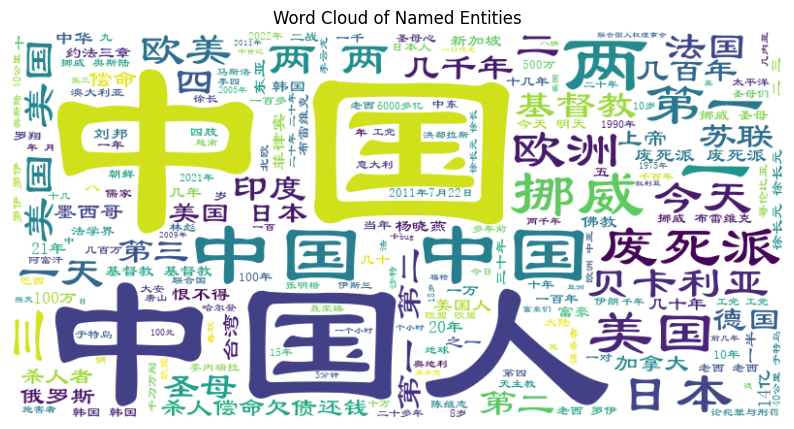

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of named entities
all_named_entities = [ent[0] for ents in df['named_entities'] for ent in ents]

# Join all named entities into a single string
all_named_entities_text = ' '.join(all_named_entities)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(all_named_entities_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Named Entities')
plt.axis('off')
plt.show()


In [30]:
from collections import Counter

# Function to extract named entities of a specific type from the dataframe
def extract_entities_by_type(entity_type):
    all_entities = [entity[0] for entities_list in df['named_entities'] for entity in entities_list if entity[1] == entity_type]
    return all_entities

# List of entity types
entity_types = ['GPE', 'ORG', 'NORP', 'PERSON', 'WORK_OF_ART', 'FAC', 'LOC', 'PRODUCT', 'EVENT', 'LANGUAGE', 'LAW', 'TIME', 'PERCENT', 'QUANTITY', 'ORDINAL', 'MISC']

# Iterate over each entity type and print the top 10 most frequent entities
for entity_type in entity_types:
    entities = extract_entities_by_type(entity_type)
    entity_counter = Counter(entities)
    top_entities = entity_counter.most_common(10)
    print(f"Top 10 {entity_type}:")
    for entity, count in top_entities:
        print(entity, count)
    print()


Top 10 GPE:
中国 524
美国 143
挪威 91
日本 69
法国 26
韩国 24
苏联 21
印度 20
德国 18
杀人偿命欠债还钱 16

Top 10 ORG:
废死派 62
基督教 33
工党 12
欧盟 12
富豪 9
佛教 9
法学界 6
圣母们 5
天主教 4
春秋 4

Top 10 NORP:
中国人 140
中国 25
美国人 12
基督教 10
中华 10
儒家 6
日本人 6
道教 3
德国人 2
挪威 2

Top 10 PERSON:
圣母 29
贝卡利亚 26
老西 23
徐长元 19
布雷维克 15
上帝 15
杀人者 14
杨晓燕 10
于特岛 9
刘邦 9

Top 10 WORK_OF_ART:
罗伊 13
论犯罪与刑罚 4
金牌 3
消失的夫妻 2
刑法修正案（ 2
十戒 2
底线 2
世界之路 1
失孤 1
圣经 1

Top 10 FAC:
废死派 8
北欧 6
富豪们 3
大安 3
北欧白左大本营 1
富人区和平民窟 1
阿尔巴尼亚 1
威吓力 1
南京碎尸案 1
乌及屋 1

Top 10 LOC:
欧洲 54
欧美 31
东亚 9
非洲 8
中东 6
地球 5
太平洋 5
中亚 4
亚洲 3
撒哈拉 3

Top 10 PRODUCT:
辱骂 2
远小于 1
[2 1
附属国 1
资产者 1
秦二世 1
杀10 1

Top 10 EVENT:
二战 7
唐山事件 2
南京大屠杀 2
十月革命 1
马田事件 1
7·22 1
近代病 1
三鹿奶粉 1
三鹿事件 1
960w平方公里 1

Top 10 LANGUAGE:
英语 3
汉语 2
法语 1
中文 1
英文 1
日语 1

Top 10 LAW:
刑法 3
十二公民 2
中华人民共和国刑法修正案 1
威慑论 1
中华人民共和国2022年国民经济和社会发展统计公报 1
废死条例 1
辛普森杀妻案 1

Top 10 TIME:
一个小时 3
5分钟 3
63% 2
一个半小时 2
微乎其微 2
十字架 2
五点 2
16小时 2
10分钟 2
八小时 2

Top 10 PERCENT:
1. 8
70% 5
74% 2
82% 2
百万分之一 2
百分之百 2
百香果 2
50% 2
百家争鸣 2
21% 1

Top 10 QUANTIT

In [7]:
import pandas as pd
import re

# Define aspect-related terms and corresponding regular expressions based on the most frequent words and top terms from clusters
aspect_patterns = {
    'cultural_and_social_attitudes': r'(文化|社会|态度|观念|传统|价值观|道德|伦理|信仰)',
    'legal_and_judicial_system': r'(法律|司法|司法|体系|法治|公正|透明|程序|改革|法律|程序)',
    'crime_deterrence_and_public_safety': r'(犯罪|防止犯罪|公共安全|安全|刑事政策|刑事体系|治安)',
    'human_rights_and_ethics': r'(人权|道德|伦理|生命权|禁止|酷刑|死刑|人道|公平|公义|冤假错案|冤案|冤枉)',
    'international_comparisons': r'(国际|国外|外国|其他国家|国家|横向对比)',
    'political_and_policy_factors': r'(政治|政策|政府|公众|公共|意识形态|立场|政府政策|立法|改革)',
    'victim_rights_and_justice': r'(受害人权利|受害人|受害者|受害者权益|司法公正|公正|司法权利|公平|正义)',
    # Add more aspect patterns based on the identified aspects and their associated terms
}


# Define a function to perform rule-based aspect identification
def identify_aspects(text):
    aspects = []
    for aspect, pattern in aspect_patterns.items():
        matches = re.findall(pattern, text)
        if matches:
            aspects.append(aspect)  # Append the aspect category instead of the matched keyword
    if not aspects:
        aspects.append('others')  # Append 'others' if no aspect matches
    return aspects

# Apply rule-based aspect identification to the '回答内容' column
df['aspect_candidates'] = df['回答内容'].apply(identify_aspects)

# Display the dataframe with identified aspect categories
print(df[['回答内容', 'aspect_candidates']].head())

# Save the DataFrame to a CSV file
file_path = file_path
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with Rule-Based Aspect Identification has been saved to the original file:", file_path)


                                                回答内容  \
0  因为不光是中国，全世界几乎所有的主要人口大国都保留了死刑，包括日本和美国这样的人口超过1亿的...   
1  因为中国人的观念很朴素呀。根本不必列废死的各种好处，国人的观点是：这人是个人渣，所以他得死。...   
2  为什么74亿人有60亿都支持死刑，而剩下的少数人谈及死刑，一般总持反对态度？这些人要不要反思一下？   
3  拿法国来说，当年法国废除死刑的时候，民调显示的废死支持率差不多不到20%——但就是在这种情况...   
4  宋江杀了阎婆惜，知县却将与此事毫不相关的唐牛儿打了一顿并刺配五百里外。回到内衙知县夫人有点儿...   

                                   aspect_candidates  
0  [human_rights_and_ethics, international_compar...  
1                    [cultural_and_social_attitudes]  
2  [cultural_and_social_attitudes, human_rights_a...  
3  [cultural_and_social_attitudes, legal_and_judi...  
4                                           [others]  
DataFrame with Rule-Based Aspect Identification has been saved to the original file: C:\Users\jesse\PycharmProjects\CN_Specturm\Topics\Death_Sentence\CSV\Death_Sentence.csv


In [8]:
from collections import Counter

# Count the frequency of each aspect category
aspect_counts = Counter([item for sublist in df['aspect_candidates'] for item in sublist])

# Store the counts of each aspect category into variables
cultural_count = aspect_counts.get('cultural_and_social_attitudes', 0)
legal_count = aspect_counts.get('legal_and_judicial_system', 0)
crime_count = aspect_counts.get('crime_deterrence_and_public_safety', 0)
human_right_count = aspect_counts.get('human_rights_and_ethics', 0)
international_count = aspect_counts.get('international_comparisons', 0)
political_policy_count = aspect_counts.get('political_and_policy_factors', 0)
victim_right_count = aspect_counts.get('victim_rights_and_justice', 0)
others_count = aspect_counts.get('others', 0)

# Display the counts
print("Cultural and Social Attitudes Count:", cultural_count)
print("Legal and Judicial System Count:", legal_count)
print("Crime Deterrence and Public Safety Count:", crime_count)
print("Human Rights and Ethics Count:", human_right_count)
print("International Comparisons Count:", international_count)
print("Political and Policy Factors Count:", political_policy_count)
print("Victim Rights and Justice Count:", victim_right_count)
print("Others Count:", others_count)


Cultural and Social Attitudes Count: 449
Legal and Judicial System Count: 356
Crime Deterrence and Public Safety Count: 299
Human Rights and Ethics Count: 1221
International Comparisons Count: 555
Political and Policy Factors Count: 175
Victim Rights and Justice Count: 270
Others Count: 466


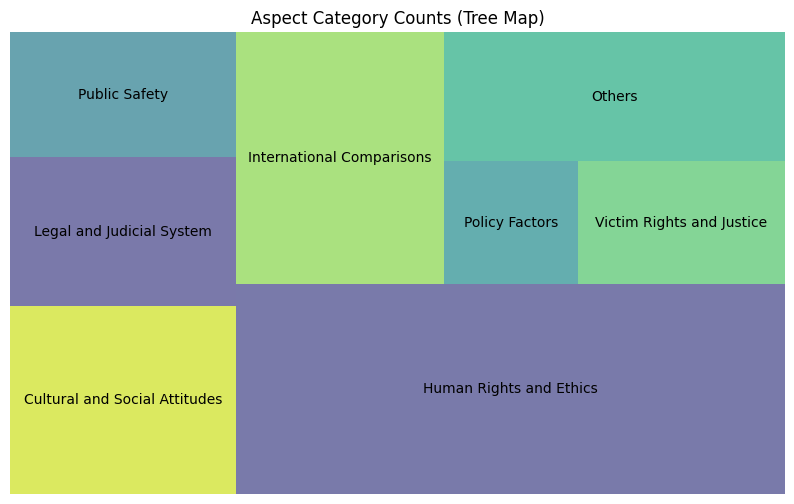

In [9]:
import matplotlib.pyplot as plt
import squarify

# Create a dictionary to store aspect category counts
aspect_counts_dict = {
    'Cultural and Social Attitudes': cultural_count,
    'Legal and Judicial System': legal_count,
    'Public Safety': crime_count,
    'Human Rights and Ethics': human_right_count,
    'International Comparisons': international_count,
    'Policy Factors': political_policy_count,
    'Victim Rights and Justice': victim_right_count,
    'Others': others_count
}

# Plotting the tree map
plt.figure(figsize=(10, 6))
squarify.plot(sizes=aspect_counts_dict.values(), label=aspect_counts_dict.keys(), alpha=0.7)
plt.axis('off')
plt.title('Aspect Category Counts (Tree Map)')
plt.show()


In [10]:
# Filter rows containing 'cultural_and_social_attitudes' in the aspect_candidates column
cultural_rows = df[df['aspect_candidates'].apply(lambda x: 'cultural_and_social_attitudes' in x)]

# Calculate sentiment distribution for 'cultural_and_social_attitudes'
cultural_sentiments = cultural_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
cultural_sentiments = cultural_sentiments.round(2)

# Print sentiment distribution for 'cultural_and_social_attitudes'
print("Sentiment distribution for 'Cultural and Social Attitudes':")
print("Positive:", cultural_sentiments.get('Positive', 0), "%")
print("Negative:", cultural_sentiments.get('Negative', 0), "%")
print("Neutral:", cultural_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'legal_and_judicial_system' in the aspect_candidates column
legal_rows = df[df['aspect_candidates'].apply(lambda x: 'legal_and_judicial_system' in x)]

# Calculate sentiment distribution for 'legal_and_judicial_system'
legal_sentiments = legal_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
legal_sentiments = legal_sentiments.round(2)

# Print sentiment distribution for 'legal_and_judicial_system'
print("Sentiment distribution for 'Legal and Judicial System':")
print("Positive:", legal_sentiments.get('Positive', 0), "%")
print("Negative:", legal_sentiments.get('Negative', 0), "%")
print("Neutral:", legal_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'crime_deterrence_and_public_safety' in the aspect_candidates column
crime_rows = df[df['aspect_candidates'].apply(lambda x: 'crime_deterrence_and_public_safety' in x)]

# Calculate sentiment distribution for 'crime_deterrence_and_public_safety'
crime_sentiments = crime_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
crime_sentiments = crime_sentiments.round(2)

# Print sentiment distribution for 'crime_deterrence_and_public_safety'
print("Sentiment distribution for 'Crime Deterrence and Public Safety':")
print("Positive:", crime_sentiments.get('Positive', 0), "%")
print("Negative:", crime_sentiments.get('Negative', 0), "%")
print("Neutral:", crime_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'human_rights_and_ethics' in the aspect_candidates column
human_rights_rows = df[df['aspect_candidates'].apply(lambda x: 'human_rights_and_ethics' in x)]

# Calculate sentiment distribution for 'human_rights_and_ethics'
human_rights_sentiments = human_rights_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
human_rights_sentiments = human_rights_sentiments.round(2)

# Print sentiment distribution for 'human_rights_and_ethics'
print("Sentiment distribution for 'Human Rights and Ethics':")
print("Positive:", human_rights_sentiments.get('Positive', 0), "%")
print("Negative:", human_rights_sentiments.get('Negative', 0), "%")
print("Neutral:", human_rights_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'international_comparisons' in the aspect_candidates column
international_rows = df[df['aspect_candidates'].apply(lambda x: 'international_comparisons' in x)]

# Calculate sentiment distribution for 'international_comparisons'
international_sentiments = international_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
international_sentiments = international_sentiments.round(2)

# Print sentiment distribution for 'international_comparisons'
print("Sentiment distribution for 'International Comparisons':")
print("Positive:", international_sentiments.get('Positive', 0), "%")
print("Negative:", international_sentiments.get('Negative', 0), "%")
print("Neutral:", international_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'political_and_policy_factors' in the aspect_candidates column
political_policy_rows = df[df['aspect_candidates'].apply(lambda x: 'political_and_policy_factors' in x)]

# Calculate sentiment distribution for 'political_and_policy_factors'
political_policy_sentiments = political_policy_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
political_policy_sentiments = political_policy_sentiments.round(2)

# Print sentiment distribution for 'political_and_policy_factors'
print("Sentiment distribution for 'Political and Policy Factors':")
print("Positive:", political_policy_sentiments.get('Positive', 0), "%")
print("Negative:", political_policy_sentiments.get('Negative', 0), "%")
print("Neutral:", political_policy_sentiments.get('Neutral', 0), "%")
print()

# Filter rows containing 'victim_rights_and_justice' in the aspect_candidates column
victim_rights_rows = df[df['aspect_candidates'].apply(lambda x: 'victim_rights_and_justice' in x)]

# Calculate sentiment distribution for 'victim_rights_and_justice'
victim_rights_sentiments = victim_rights_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
victim_rights_sentiments = victim_rights_sentiments.round(2)

# Print sentiment distribution for 'victim_rights_and_justice'
print("Sentiment distribution for 'Victim Rights and Justice':")
print("Positive:", victim_rights_sentiments.get('Positive', 0), "%")
print("Negative:", victim_rights_sentiments.get('Negative', 0), "%")
print("Neutral:", victim_rights_sentiments.get('Neutral', 0), "%")
print()


# Filter rows containing 'others' in the aspect_candidates column
others_rows = df[df['aspect_candidates'].apply(lambda x: 'others' in x)]

# Calculate sentiment distribution for 'others'
others_sentiments = others_rows['sentiment_label'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
others_sentiments = others_sentiments.round(2)

# Print sentiment distribution for 'others'
print("Sentiment distribution for 'Others':")
print("Positive:", others_sentiments.get('Positive', 0), "%")
print("Negative:", others_sentiments.get('Negative', 0), "%")
print("Neutral:", others_sentiments.get('Neutral', 0), "%")
print()


Sentiment distribution for 'Cultural and Social Attitudes':
Positive: 3.56 %
Negative: 75.5 %
Neutral: 20.94 %

Sentiment distribution for 'Legal and Judicial System':
Positive: 2.25 %
Negative: 76.4 %
Neutral: 21.35 %

Sentiment distribution for 'Crime Deterrence and Public Safety':
Positive: 3.34 %
Negative: 76.92 %
Neutral: 19.73 %

Sentiment distribution for 'Human Rights and Ethics':
Positive: 6.8 %
Negative: 77.23 %
Neutral: 15.97 %

Sentiment distribution for 'International Comparisons':
Positive: 3.96 %
Negative: 76.76 %
Neutral: 19.28 %

Sentiment distribution for 'Political and Policy Factors':
Positive: 1.71 %
Negative: 75.43 %
Neutral: 22.86 %

Sentiment distribution for 'Victim Rights and Justice':
Positive: 2.22 %
Negative: 76.67 %
Neutral: 21.11 %

Sentiment distribution for 'Others':
Positive: 28.33 %
Negative: 62.66 %
Neutral: 9.01 %



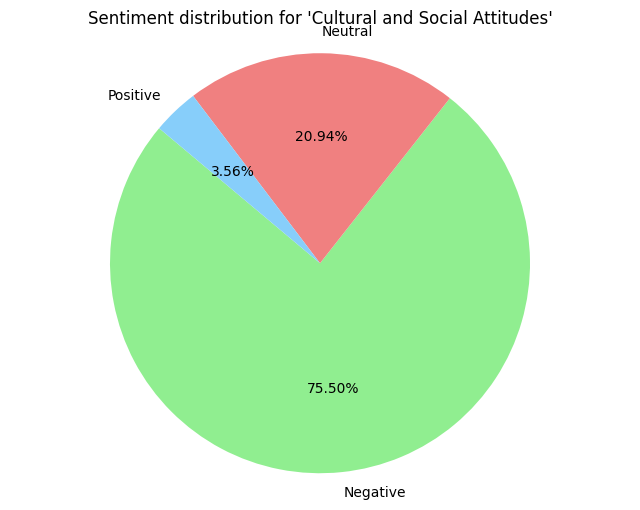

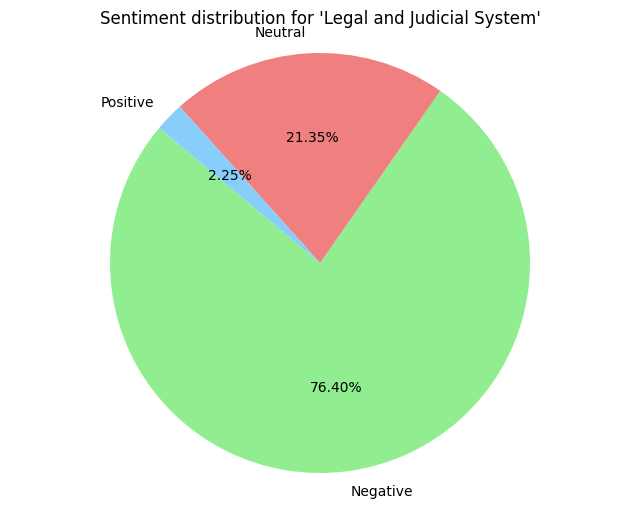

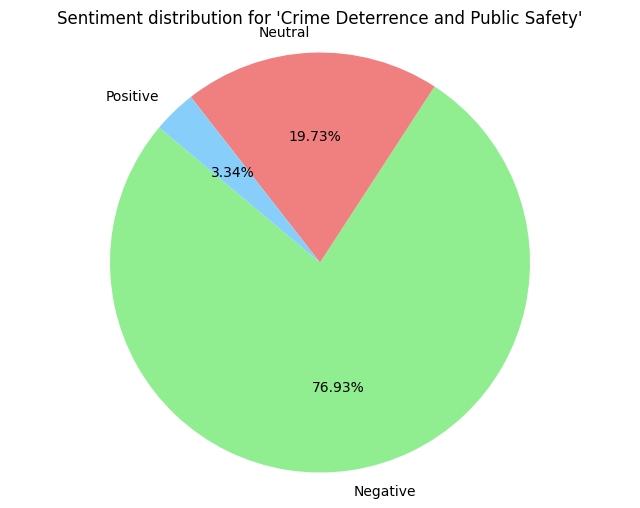

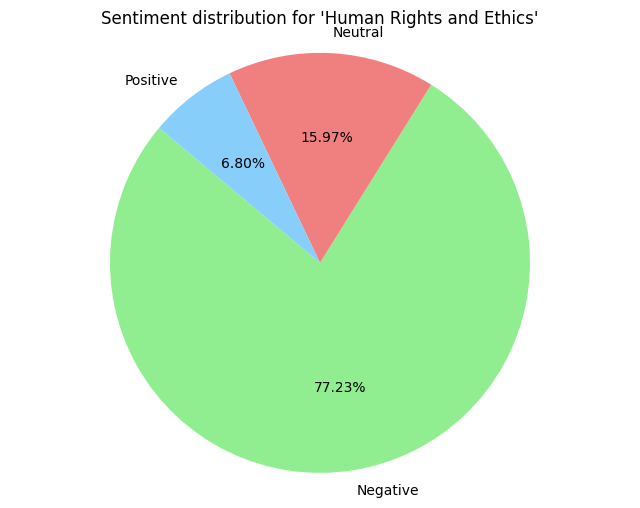

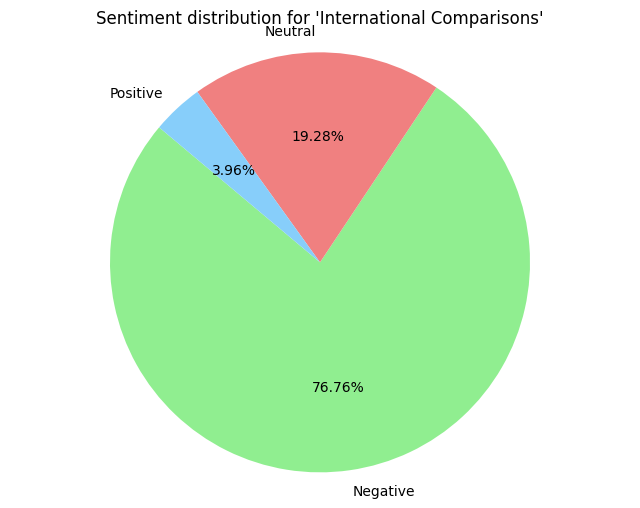

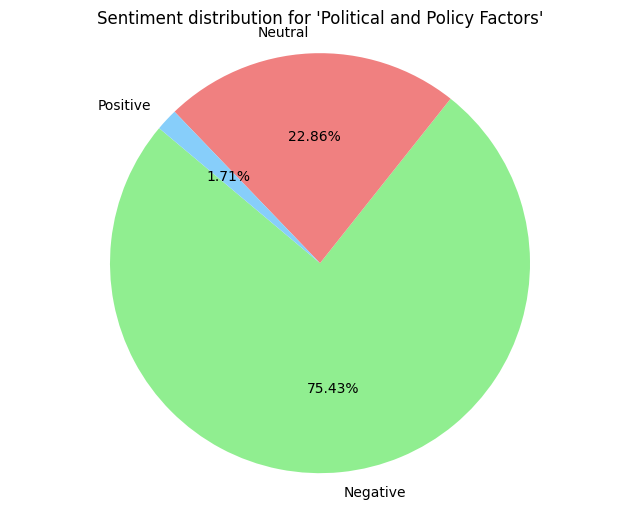

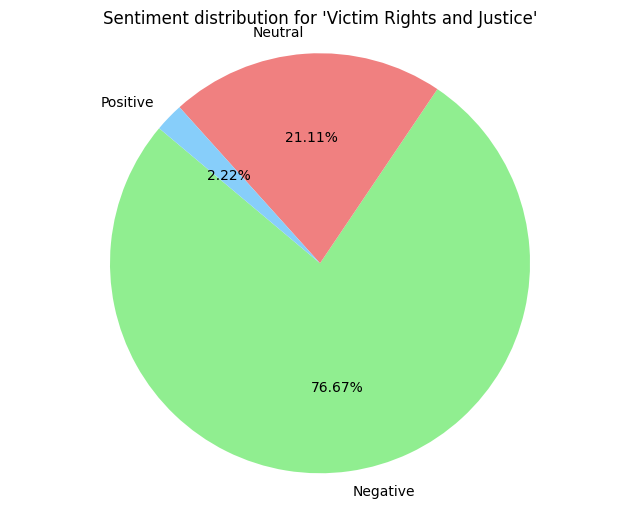

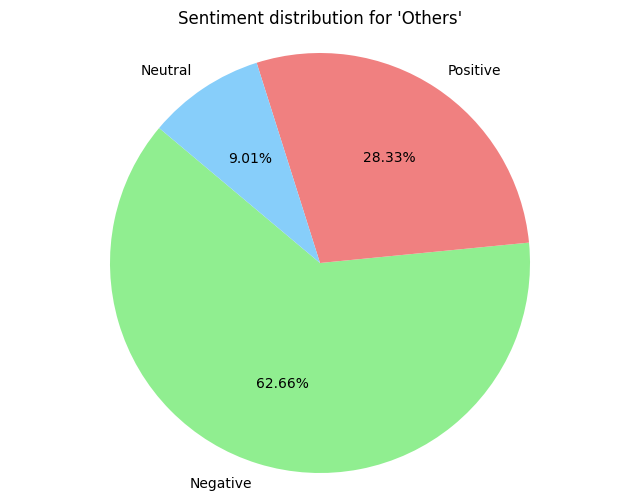

In [11]:
import matplotlib.pyplot as plt

# Define a function to create a pie chart for sentiment distribution
def plot_pie_chart(sentiments, aspect_name):
    labels = sentiments.index
    sizes = sentiments.values
    colors = ['lightgreen', 'lightcoral', 'lightskyblue']
    
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f"Sentiment distribution for '{aspect_name}'")
    plt.show()

# Plot pie chart for 'cultural_and_social_attitudes'
plot_pie_chart(cultural_sentiments, 'Cultural and Social Attitudes')

# Plot pie chart for 'legal_and_judicial_system'
plot_pie_chart(legal_sentiments, 'Legal and Judicial System')

# Plot pie chart for 'crime_deterrence_and_public_safety'
plot_pie_chart(crime_sentiments, 'Crime Deterrence and Public Safety')

# Plot pie chart for 'human_rights_and_ethics'
plot_pie_chart(human_rights_sentiments, 'Human Rights and Ethics')

# Plot pie chart for 'international_comparisons'
plot_pie_chart(international_sentiments, 'International Comparisons')

# Plot pie chart for 'political_and_policy_factors'
plot_pie_chart(political_policy_sentiments, 'Political and Policy Factors')

# Plot pie chart for 'victim_rights_and_justice'
plot_pie_chart(victim_rights_sentiments, 'Victim Rights and Justice')

# Plot pie chart for 'others'
plot_pie_chart(others_sentiments, 'Others')


In [12]:
import pandas as pd
import gc

def get_dataframes_in_memory():
    """
    Get the names and number of DataFrames currently in memory.
    """
    dataframes = [(name, obj) for name, obj in globals().items() if isinstance(obj, pd.DataFrame)]
    return dataframes

# Print the names and number of DataFrames currently in memory
dataframes_in_memory = get_dataframes_in_memory()
num_dataframes = len(dataframes_in_memory)
print(f"Number of DataFrames in memory: {num_dataframes}")

if num_dataframes > 0:
    print("Names of DataFrames in memory:")
    for name, _ in dataframes_in_memory:
        print(name)


Number of DataFrames in memory: 13
Names of DataFrames in memory:
_
__
df
_1
_6
cultural_rows
legal_rows
crime_rows
human_rights_rows
international_rows
political_policy_rows
victim_rights_rows
others_rows
